<a href="https://colab.research.google.com/github/ChaitrikaNelluri/CODINGSAMURAI/blob/main/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
uploaded = files.upload()


Saving Reviews.csv.csv to Reviews.csv.csv


In [25]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [26]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
df = pd.read_csv("Reviews.csv.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [62]:
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [63]:
def get_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Score'].apply(get_sentiment)

df[['Score','Sentiment']].head()


,Score,Sentiment
0,5,Positive
1,1,Negative
2,4,Positive
3,2,Negative
4,5,Positive


In [64]:
df = df[['Text','Sentiment','Score']]
df.head()


,Text,Sentiment,Score
0,I have bought several of the Vitality canned d...,Positive,5
1,Product arrived labeled as Jumbo Salted Peanut...,Negative,1
2,This is a confection that has been around a fe...,Positive,4
3,If you are looking for the secret ingredient i...,Negative,2
4,Great taffy at a great price. There was a wid...,Positive,5


In [65]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['Text'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Sentiment,Score,clean_text
0,I have bought several of the Vitality canned d...,Positive,5,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,Negative,1,product arrived labeled jumbo salted peanuts p...
2,This is a confection that has been around a fe...,Positive,4,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,Negative,2,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,Positive,5,great taffy great price wide assortment yummy ...


In [66]:
!pip install vaderSentiment


In [67]:
df = df.sample(2000, random_state=42)


In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns


In [69]:
analyzer = SentimentIntensityAnalyzer()

scores = df['Text'].apply(lambda review: analyzer.polarity_scores(str(review)))

vaders = pd.DataFrame(list(scores))
vaders = pd.concat([df[['Score']], vaders], axis=1)

vaders.head()


,Score,neg,neu,pos,compound
165256,5.0,NaN,NaN,NaN,NaN
231465,5.0,NaN,NaN,NaN,NaN
427827,3.0,NaN,NaN,NaN,NaN
433954,2.0,NaN,NaN,NaN,NaN
70260,5.0,NaN,NaN,NaN,NaN


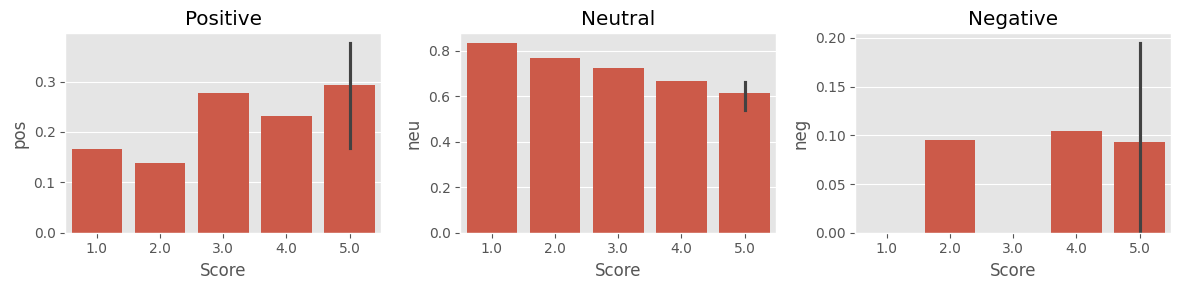

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


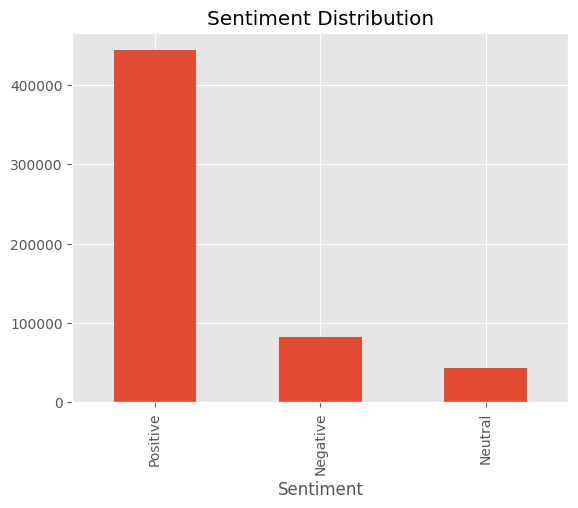

In [33]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.show()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['Sentiment']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8677379915736514
              precision    recall  f1-score   support

    Negative       0.73      0.68      0.71     16181
     Neutral       0.51      0.18      0.27      8485
    Positive       0.90      0.97      0.93     89025

    accuracy                           0.87    113691
   macro avg       0.71      0.61      0.64    113691
weighted avg       0.85      0.87      0.85    113691



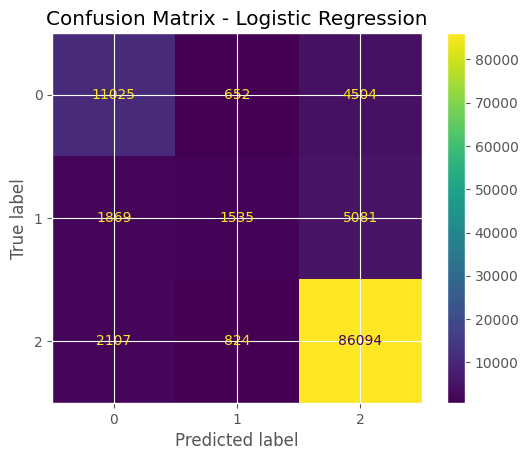

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [38]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_acc)
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.818613610576035
              precision    recall  f1-score   support

    Negative       0.84      0.27      0.41     16181
     Neutral       0.44      0.00      0.00      8485
    Positive       0.82      1.00      0.90     89025

    accuracy                           0.82    113691
   macro avg       0.70      0.42      0.44    113691
weighted avg       0.79      0.82      0.76    113691



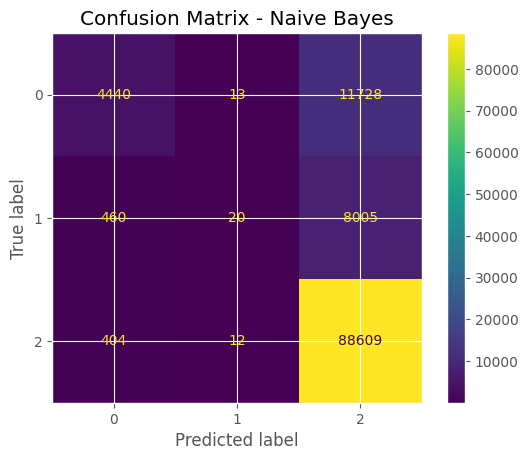

In [39]:
cm_nb = confusion_matrix(y_test, nb_pred)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


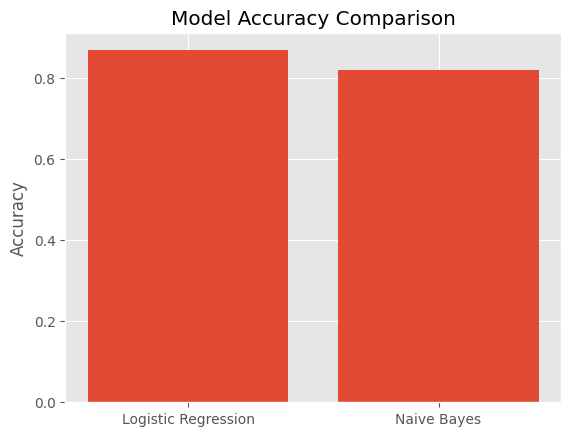

In [40]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [lr_acc, nb_acc]

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [41]:
def predict_sentiment(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = lr_model.predict(vector)
    return prediction[0]

print(predict_sentiment("I really love this product"))
print(predict_sentiment("This is very bad and disappointing"))


Positive
Negative
